# Ejercicio 2: Wind speed

## Load data

In [13]:
import pandas as pd
df_wind = pd.read_csv('../data/data_wind.csv')

In [14]:
df_wind.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


In [15]:
df_wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   HORA (UTC)                                             87693 non-null  object 
 1   VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))             87693 non-null  float64
 2   VENTO, VELOCIDADE HORARIA (m/s)                        87693 non-null  float64
 3   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 4   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 5   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 6   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    87693 non-null  float64
 8   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR

In [16]:
df_wind.isnull().sum().sum()

0

We don't have missing values.

In [17]:
df_wind.columns

Index(['HORA (UTC)', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))',
       'VENTO, VELOCIDADE HORARIA (m/s)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)',
       'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)', 'VENTO, RAJADA MAXIMA (m/s)',
       'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'],
      dtype='object')

## Preprocessing

In [18]:
df_wind_preprocessed = df_wind.copy()

We don't have significative column names so we can rename them.

In [19]:
new_columns = [
    'Hour',
    'Wind direction (gr)',
    'Wind speed (m/s)',
    'Relative humidity max (%)',
    'Relative humidity min (%)',
    'Temperature min (℃)',
    'Temperature max (℃)',
    'Relative humidity (%)',
    'Atmospheric pressure at station level (mB)',
    'Precipitation (mm)',
    'Wind gust max (m/s)',
    'Atmospheric pressure max (mB)',
    'Atmospheric pressure min (mB)'
]

df_wind_preprocessed.rename(columns=dict(zip(df_wind.columns, new_columns)), inplace=True)
df_wind_preprocessed.columns

Index(['Hour', 'Wind direction (gr)', 'Wind speed (m/s)',
       'Relative humidity max (%)', 'Relative humidity min (%)',
       'Temperature min (℃)', 'Temperature max (℃)', 'Relative humidity (%)',
       'Atmospheric pressure at station level (mB)', 'Precipitation (mm)',
       'Wind gust max (m/s)', 'Atmospheric pressure max (mB)',
       'Atmospheric pressure min (mB)'],
      dtype='object')

In [20]:
total_added = 0

for _ in range(23):
    hours = df_wind_preprocessed['Hour']
    idx = 0
    nb_added = 0

    while idx < len(hours) - 1:
        cur_hour = int(hours[idx].split(':')[0])
        next_hour = int(hours[idx + 1].split(':')[0])
        if next_hour != (cur_hour + 1) % 24:
            # print(cur_hour, next_hour, f"=> add {str((cur_hour + 1) % 24)+':00'}")
            if (cur_hour + 1) % 24 < 10:
                new_str = "0"+str((cur_hour + 1) % 24)+":00"
            else:
                new_str = str((cur_hour + 1) % 24)+":00"
            new_row = pd.DataFrame({'Hour': [new_str]})
            df_wind_preprocessed = pd.concat([df_wind_preprocessed.iloc[:idx + nb_added + 1], new_row, df_wind_preprocessed.iloc[idx + nb_added + 1:]], ignore_index=True)
            nb_added += 1
        idx += 1
    print(f"Added {nb_added} rows")
    total_added += nb_added

print(f"Added {total_added} en total")

Added 866 rows
Added 332 rows
Added 241 rows
Added 182 rows
Added 141 rows
Added 122 rows
Added 106 rows
Added 92 rows
Added 79 rows
Added 67 rows
Added 57 rows
Added 52 rows
Added 44 rows
Added 41 rows
Added 37 rows
Added 31 rows
Added 27 rows
Added 23 rows
Added 16 rows
Added 11 rows
Added 8 rows
Added 5 rows
Added 3 rows
Added 2583 en total


The hour is given as a string. Considered we have data for almost ten years, we can change the format of the hour, starting with a given year, for instance the year 2000.

In [21]:
import datetime as dt

start_date = dt.datetime(2000, 1, 1, int(df_wind_preprocessed['Hour'][0][:2]))

df_wind_preprocessed['Date'] = [start_date + dt.timedelta(hours=i) for i in range(len(df_wind_preprocessed['Hour']))]

The data are not in the units of the international system. We can change that.

In [22]:
df_wind_preprocessed['Hour'] = df_wind_preprocessed['Hour'].apply(lambda x: int(x.split(':')[0]))

df_wind_preprocessed['Relative humidity max'] = df_wind_preprocessed['Relative humidity max (%)'].apply(lambda x: x/100)
df_wind_preprocessed.drop(columns=['Relative humidity max (%)'], inplace=True)

df_wind_preprocessed['Relative humidity min'] = df_wind_preprocessed['Relative humidity min (%)'].apply(lambda x: x/100)
df_wind_preprocessed.drop(columns=['Relative humidity min (%)'], inplace=True)

df_wind_preprocessed['Temperature max (K)'] = df_wind_preprocessed['Temperature max (℃)'].apply(lambda x: x+273.15)
df_wind_preprocessed.drop(columns=['Temperature max (℃)'], inplace=True)

df_wind_preprocessed['Temperature min (K)'] = df_wind_preprocessed['Temperature min (℃)'].apply(lambda x: x+273.15)
df_wind_preprocessed.drop(columns=['Temperature min (℃)'], inplace=True)

df_wind_preprocessed['Relative humidity'] = df_wind_preprocessed['Relative humidity (%)'].apply(lambda x: x/100)
df_wind_preprocessed.drop(columns=['Relative humidity (%)'], inplace=True)

df_wind_preprocessed['Atmospheric pressure at station level (Pa)'] = df_wind_preprocessed['Atmospheric pressure at station level (mB)'].apply(lambda x: x*100)
df_wind_preprocessed.drop(columns=['Atmospheric pressure at station level (mB)'], inplace=True)

df_wind_preprocessed['Precipitation (m)'] = df_wind_preprocessed['Precipitation (mm)'].apply(lambda x: x/1000)
df_wind_preprocessed.drop(columns=['Precipitation (mm)'], inplace=True)

df_wind_preprocessed['Atmospheric pressure max (Pa)'] = df_wind_preprocessed['Atmospheric pressure max (mB)'].apply(lambda x: x*100)
df_wind_preprocessed.drop(columns=['Atmospheric pressure max (mB)'], inplace=True)

df_wind_preprocessed['Atmospheric pressure min (Pa)'] = df_wind_preprocessed['Atmospheric pressure min (mB)'].apply(lambda x: x*100)
df_wind_preprocessed.drop(columns=['Atmospheric pressure min (mB)'], inplace=True)

df_wind_preprocessed.columns

Index(['Hour', 'Wind direction (gr)', 'Wind speed (m/s)',
       'Wind gust max (m/s)', 'Date', 'Relative humidity max',
       'Relative humidity min', 'Temperature max (K)', 'Temperature min (K)',
       'Relative humidity', 'Atmospheric pressure at station level (Pa)',
       'Precipitation (m)', 'Atmospheric pressure max (Pa)',
       'Atmospheric pressure min (Pa)'],
      dtype='object')

In [23]:
df_wind_preprocessed.head()

,Hour,Wind direction (gr),Wind speed (m/s),Wind gust max (m/s),Date,Relative humidity max,Relative humidity min,Temperature max (K),Temperature min (K),Relative humidity,Atmospheric pressure at station level (Pa),Precipitation (m),Atmospheric pressure max (Pa),Atmospheric pressure min (Pa)
0,12,0.809017,1.8,3.8,2000-01-01 12:00:00,0.69,0.60,293.85,295.75,0.61,88820.0,0.0,88820.0,88770.0
1,13,0.965926,2.7,4.7,2000-01-01 13:00:00,0.62,0.55,295.65,297.35,0.55,88840.0,0.0,88840.0,88820.0
2,14,0.891007,2.0,4.9,2000-01-01 14:00:00,0.56,0.50,297.45,298.65,0.51,88810.0,0.0,88840.0,88810.0
3,15,0.848048,2.5,5.8,2000-01-01 15:00:00,0.52,0.44,298.15,300.55,0.44,88740.0,0.0,88810.0,88740.0
4,16,0.224951,2.4,5.8,2000-01-01 16:00:00,0.50,0.43,298.65,300.25,0.46,88650.0,0.0,88740.0,88650.0


## Imputation of data

In [25]:
import warnings
warnings.filterwarnings('ignore')

data_wind_imputed = df_wind_preprocessed.interpolate(method='linear', axis=0)

data_wind_imputed.to_csv('../data/data_wind_imputed.csv', index=False)

### Boxplot

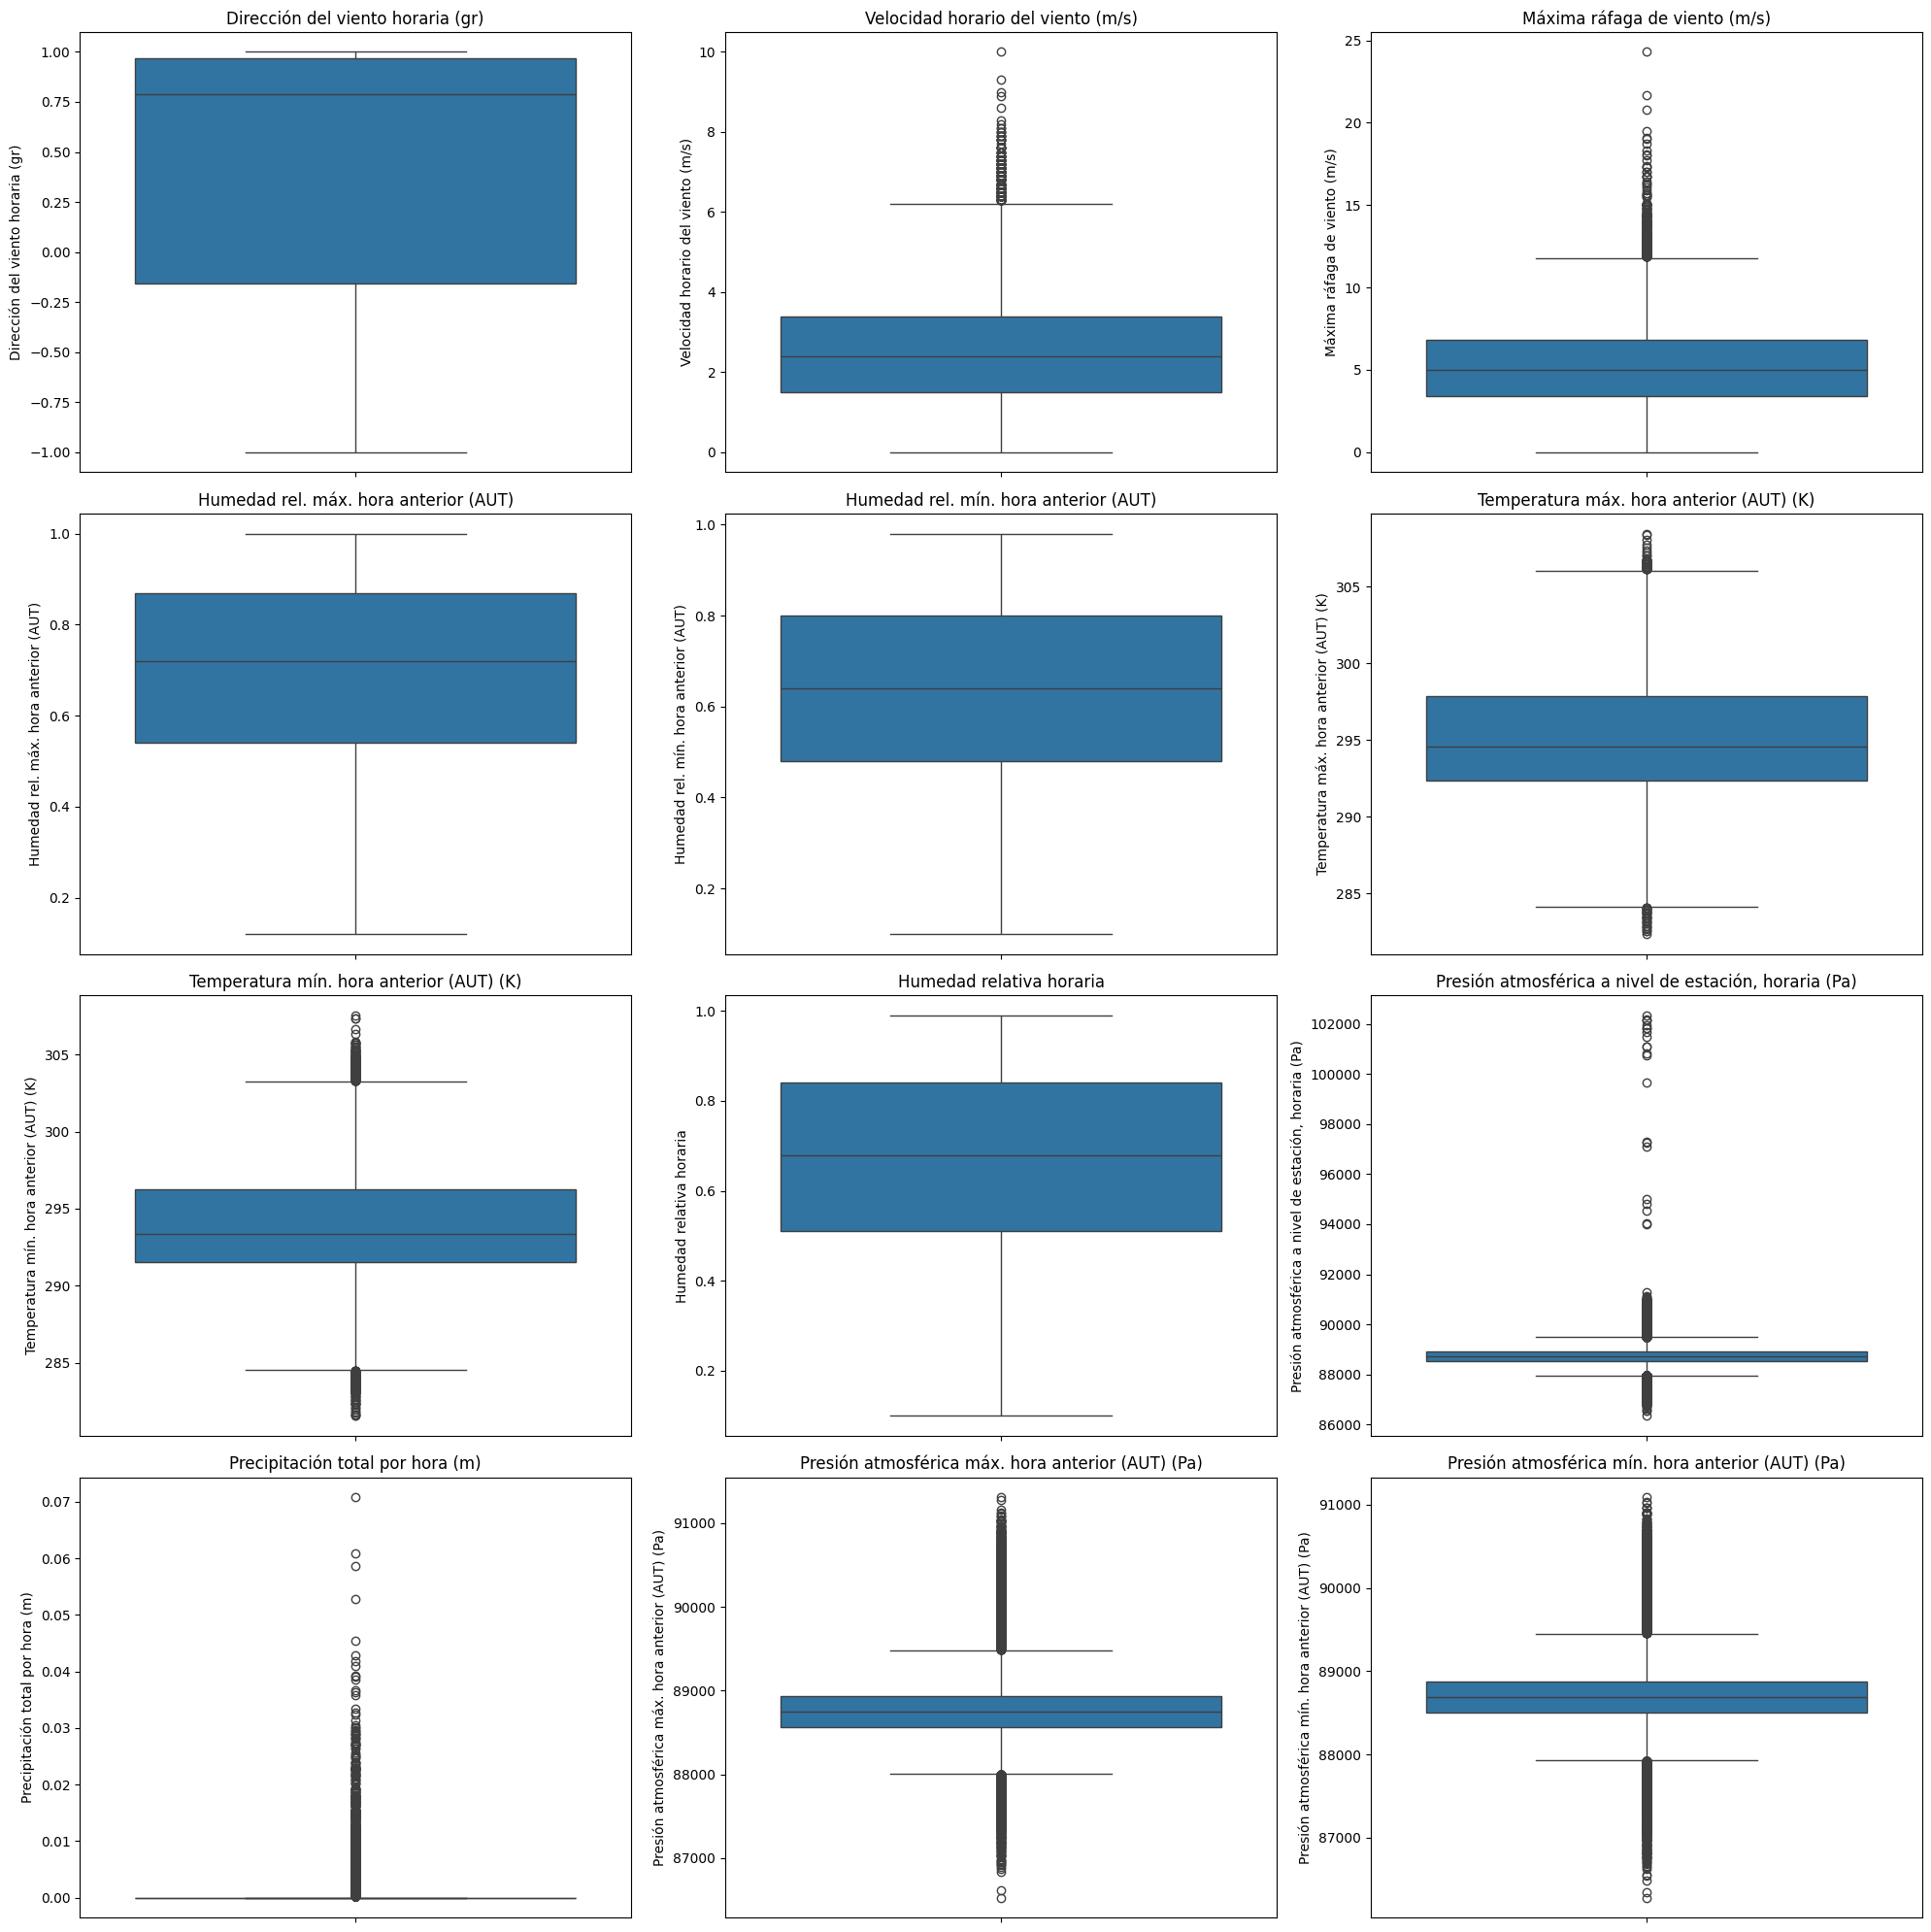

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 3, figsize=(20, 20))

for i, column in enumerate(data_eda.columns):
    sns.boxplot(data=data_eda[column], ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(column)

plt.tight_layout()
plt.show()


We can see a lot of outliers.  
For the total precipitation, the high majority of values are concentrated around 0 which means we have a lot of hours without rain.

Let's see the correlation of the variables with the output.

### Scatterplot and regplot

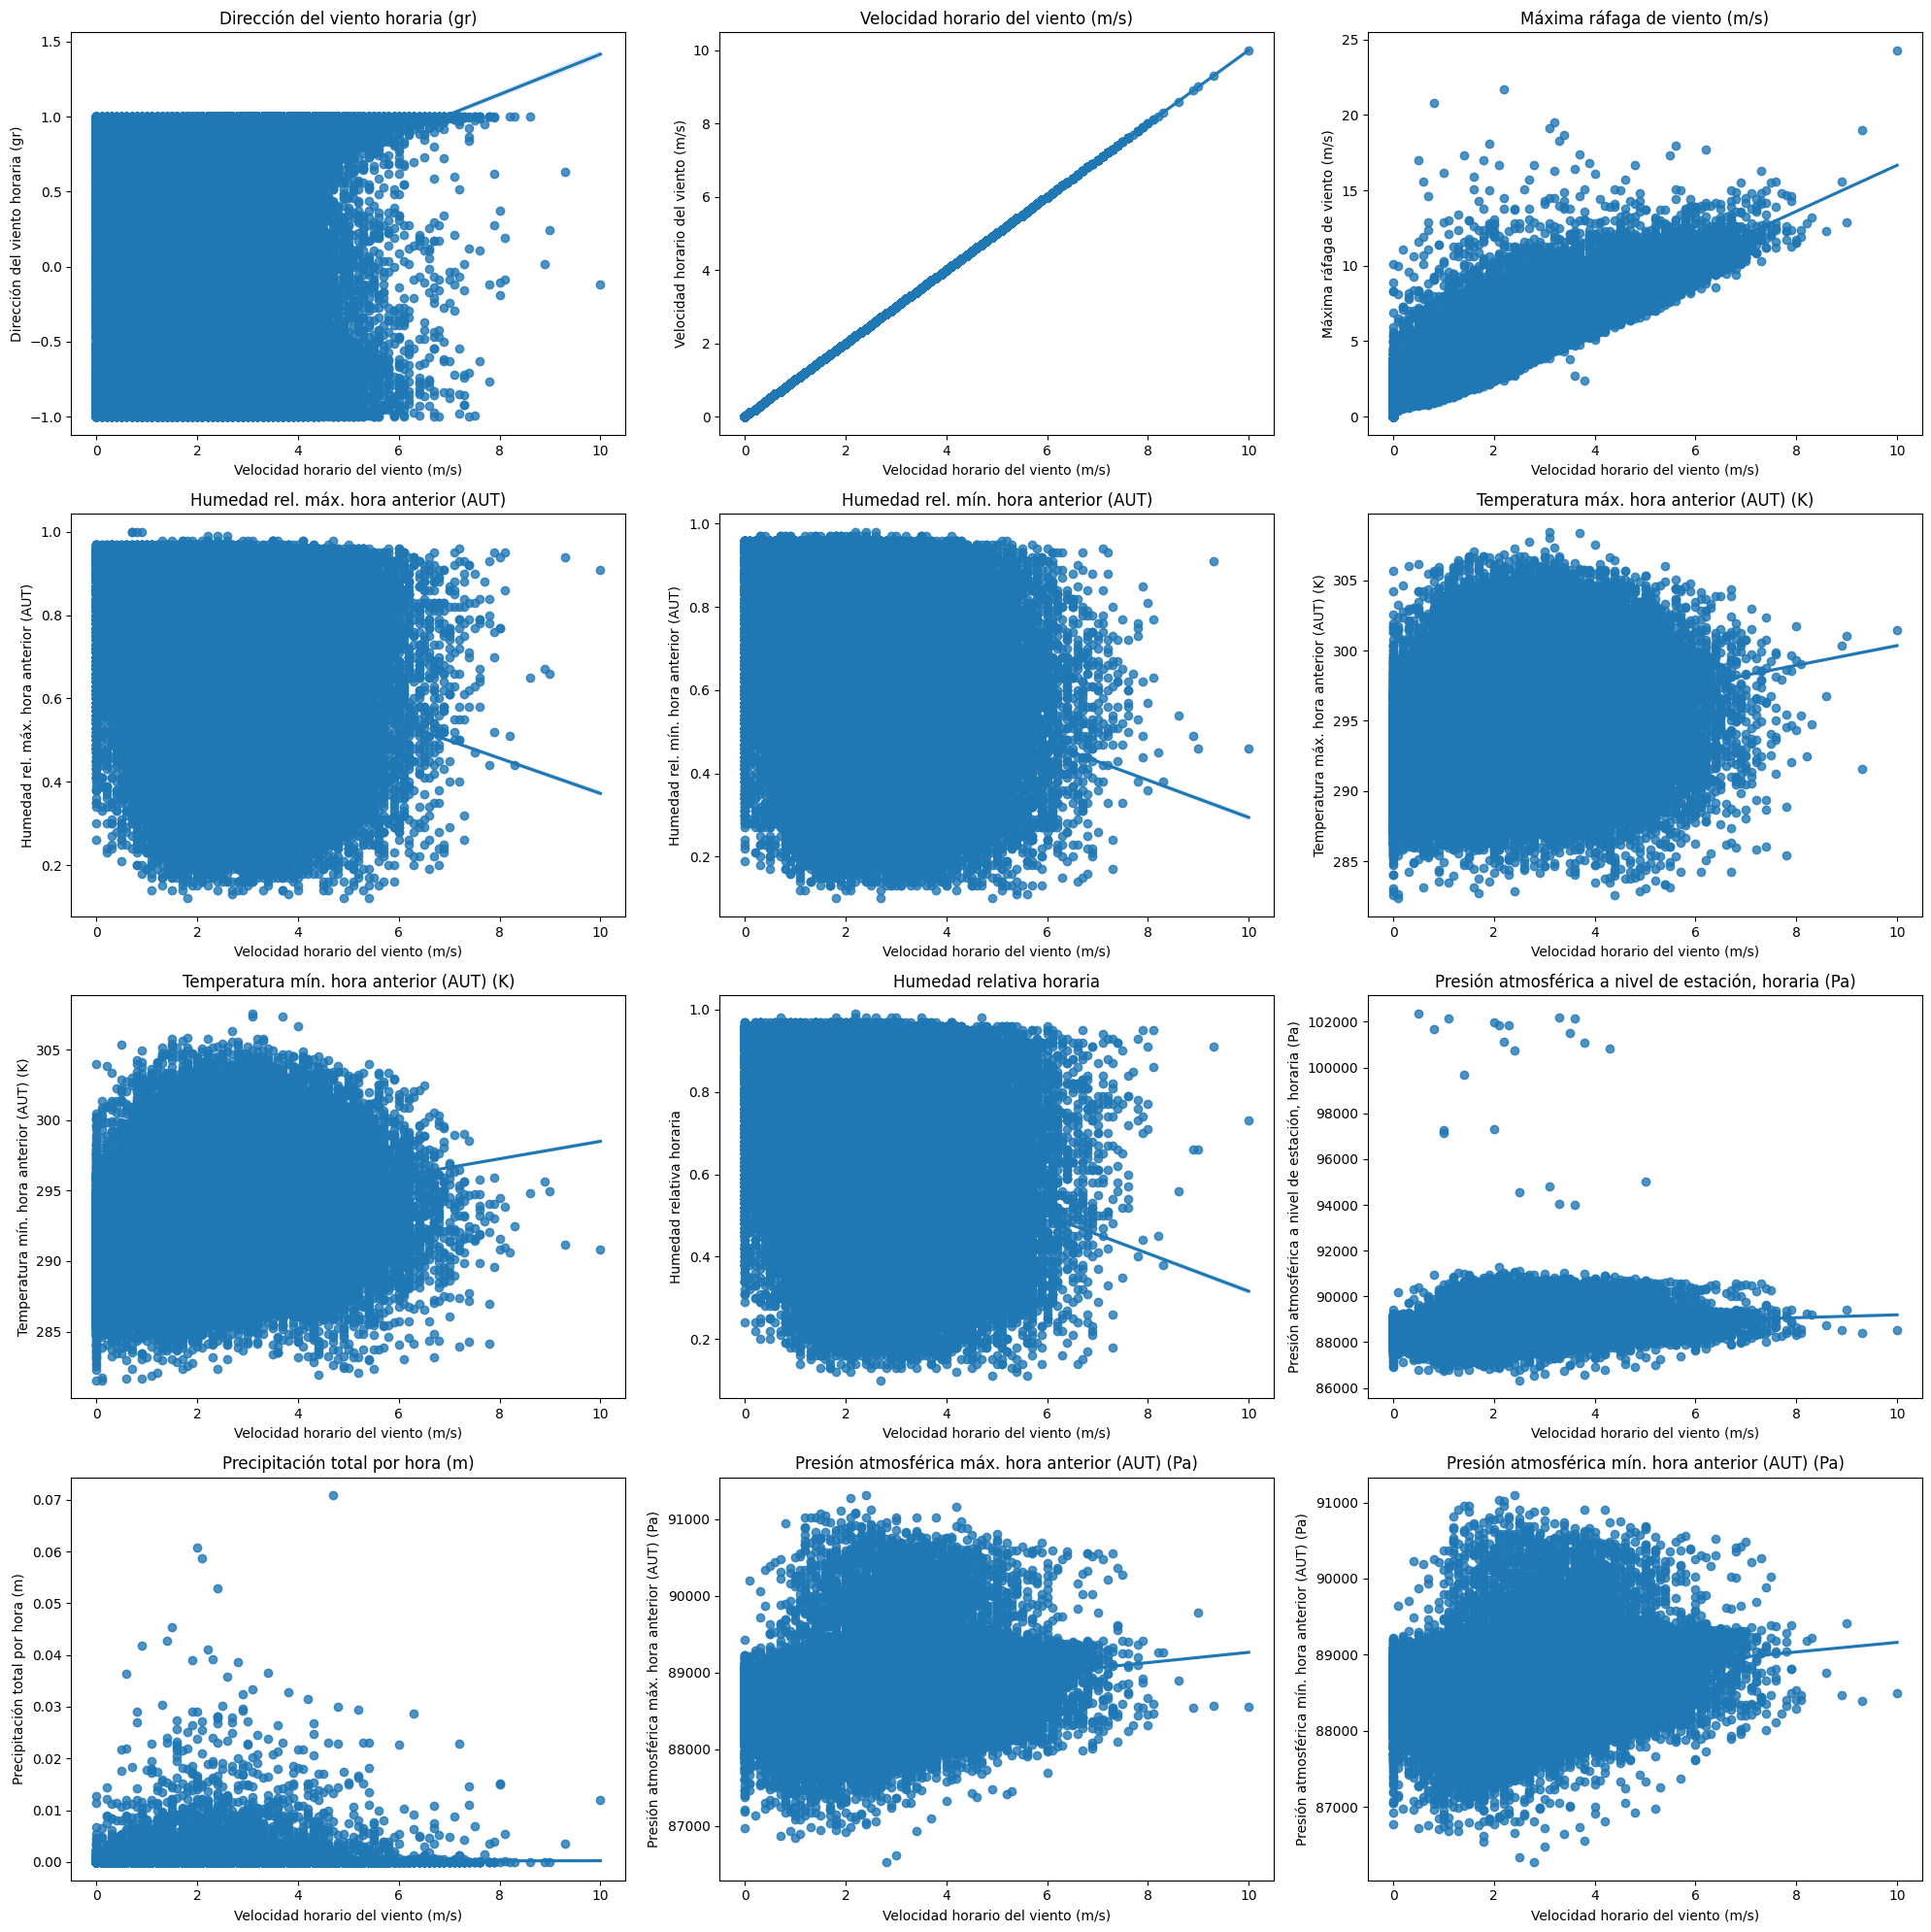

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 3, figsize=(20, 20))

for i, column in enumerate(data_eda.columns):
    sns.regplot(data=data_eda, x='Velocidad horario del viento (m/s)', y=column, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(column)

plt.tight_layout()
plt.show()

In general there is not a clear linear correlation between the values and the output except for the pressure and the wind gusts.

We are going to use an linear imputation because a value is high correlated to the last and the next value.